
## Преобразование mel-спектограмм в звук для проверки, что модели корректно работают

In [87]:
import pandas as pd
import numpy as np
from PIL import Image
import librosa

In [88]:
librosa.__version__

'0.7.2'

In [89]:
results =pd.read_csv(r"C:\Users\Asus\Documents\собеседовния\NeuroData Model\result_version_2\results.csv", engine='python',encoding='utf-8')

In [90]:
results["result"].value_counts()

noisy    327
clean     10
Name: result, dtype: int64

In [91]:
327/337

0.9703264094955489

In [92]:
def normalize_data(numpy_array):
        numpy_array =(numpy_array -numpy_array.min())/ (numpy_array.max()- numpy_array.min()) *255
        return numpy_array.astype(np.uint8)

In [93]:
denoised_file =results.iloc[12]["denoised_file"]

In [94]:
clean_file =results.iloc[12]["file_name"].replace("test", "val\clean")

In [95]:
noisy_file =results.iloc[12]["file_name"]

In [96]:
noisy_file

'C:\\Users\\Asus\\Documents\\собеседовния\\NeuroData Model\\test\\1084\\1084_151395_1084-151395-0020.npy'

In [97]:
clean_file

'C:\\Users\\Asus\\Documents\\собеседовния\\NeuroData Model\\val\\clean\\1084\\1084_151395_1084-151395-0020.npy'

In [98]:
denoised_file

'C:\\Users\\Asus\\Documents\\собеседовния\\NeuroData Model\\result_version_2\\denoised\\1084\\1084_151395_1084-151395-0020.npy'

In [99]:
noisy_numpy =normalize_data(np.load(r""+str(noisy_file)))
denoised_numpy =normalize_data(np.load(r""+str(denoised_file)))
clean_numpy =normalize_data(np.load(r""+str(clean_file)))

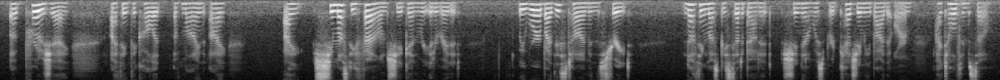

In [100]:
Image.fromarray(clean_numpy.T)

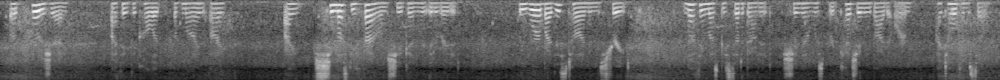

In [101]:
Image.fromarray(noisy_numpy.T)

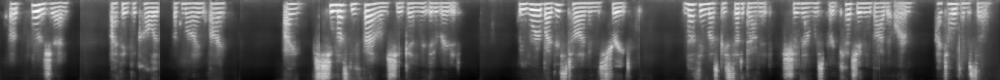

In [102]:
Image.fromarray(denoised_numpy.T)

In [103]:
clean_numpy

array([[ 95, 119, 128, ...,  19,   7,  10],
       [ 93, 117, 131, ...,  18,   8,   6],
       [102, 132, 137, ...,  13,   8,   6],
       ...,
       [116, 132, 135, ...,  14,  11,  19],
       [111, 139, 139, ...,  11,   6,  19],
       [115, 138, 135, ...,  11,  14,  17]], dtype=uint8)

In [104]:
noisy_numpy =np.load(r""+str(noisy_file)).astype(np.float32)
denoised_numpy =np.load(r""+str(denoised_file)).astype(np.float32)
clean_numpy =np.load(r""+str(clean_file)).astype(np.float32)

In [105]:
def denormalize(image):
    return np.exp(((image -1)*10).T) -1.e-12

In [106]:
audio =librosa.feature.inverse.mel_to_audio(denormalize(clean_numpy),sr=16000,  n_fft=1024, hop_length=256)

In [107]:
librosa.output.write_wav("audio_examples/clean.wav", audio,16000)

In [108]:
audio =librosa.feature.inverse.mel_to_audio(denormalize(noisy_numpy),sr=16000,  n_fft=1024, hop_length=256)

In [109]:
librosa.output.write_wav("audio_examples/noisy.wav", audio,16000)

In [110]:
audio =librosa.feature.inverse.mel_to_audio(denormalize(denoised_numpy),sr=16000,  n_fft=1024, hop_length=256)

In [111]:
librosa.output.write_wav("audio_examples/denormalize.wav", audio,16000)